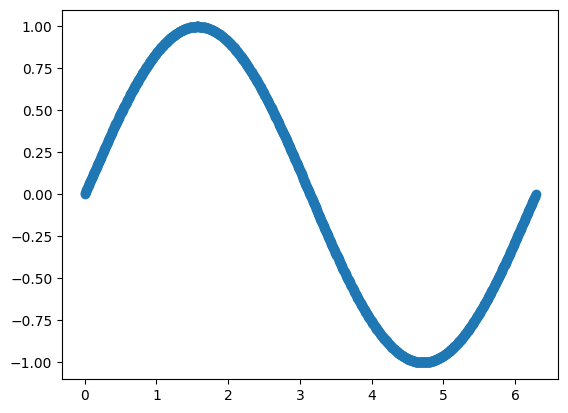

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import ifft, fft, fftfreq
import pandas as pd

times = np.linspace(0,2*np.pi, 1024)
output = np.sin(times)
plt.scatter(times,output)
plt.show()





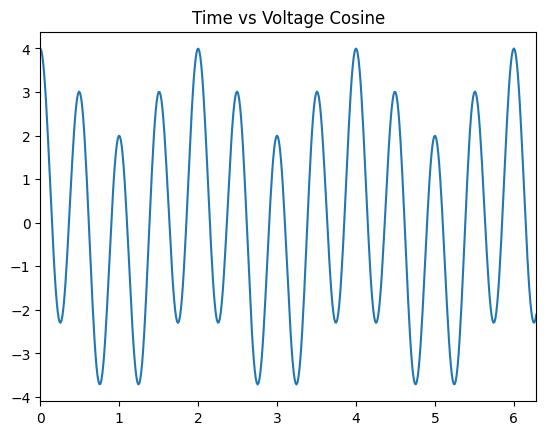

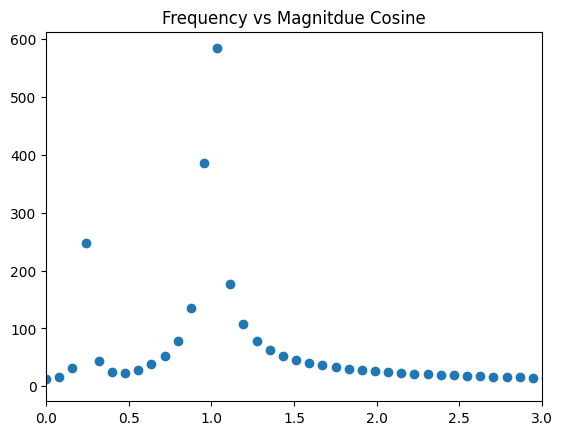

1.0345071300973196


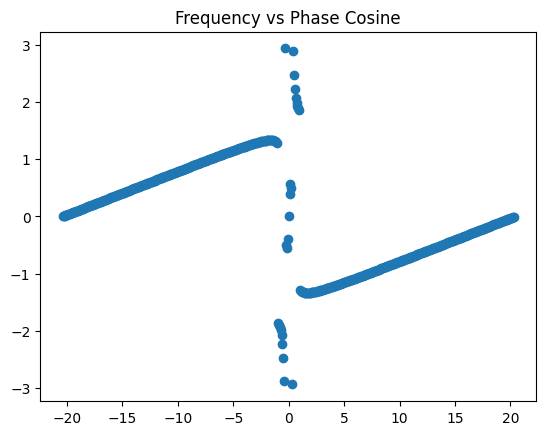

In [45]:

times = np.linspace(0,2*np.pi, 512)
output = np.cos(np.pi*times) +3* np.cos(4*np.pi*times)
plt.plot(times, output)
plt.xlim(0,2*np.pi)
plt.title("Time vs Voltage Cosine")
plt.show()

cosine_freqs = fftfreq(len(times), 4*np.pi/len(times))
cosine_ft = fft(output)
cosine_ft_mag = np.abs(cosine_ft)
cosine_ft_phase = np.angle(cosine_ft)

plt.scatter(cosine_freqs, cosine_ft_mag)
plt.xlim(0,3)
plt.title("Frequency vs Magnitdue Cosine")
plt.show()

max_freq_index = np.argmax(cosine_ft_mag)
print(cosine_freqs[max_freq_index])

plt.scatter(cosine_freqs, cosine_ft_phase)
plt.title("Frequency vs Phase Cosine")
plt.show()


[ 1.          0.98813233  0.95281099 ... -0.85108326 -0.76033551
 -0.65154094]


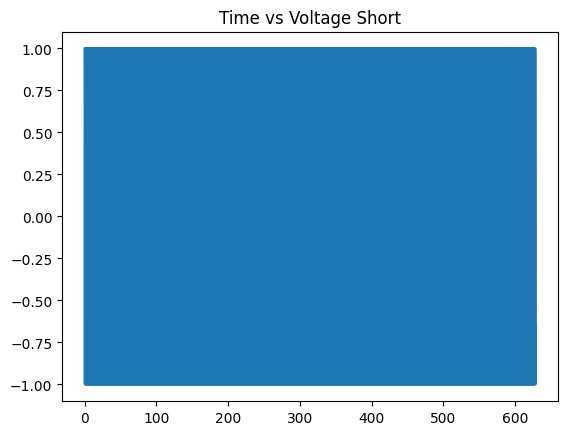

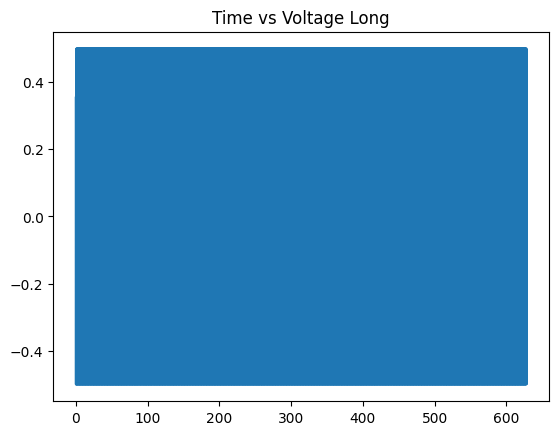

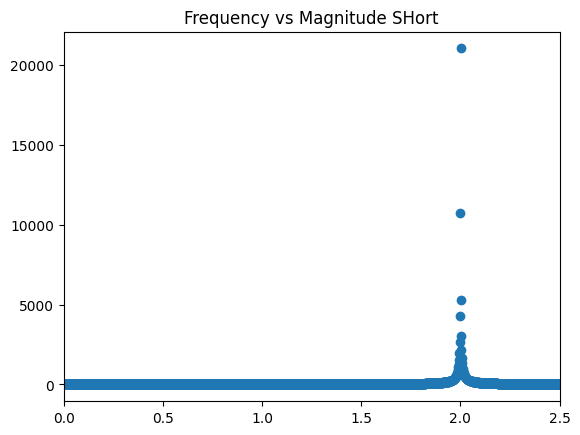

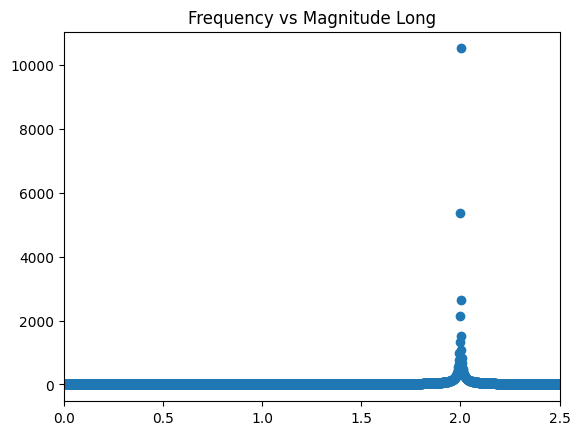

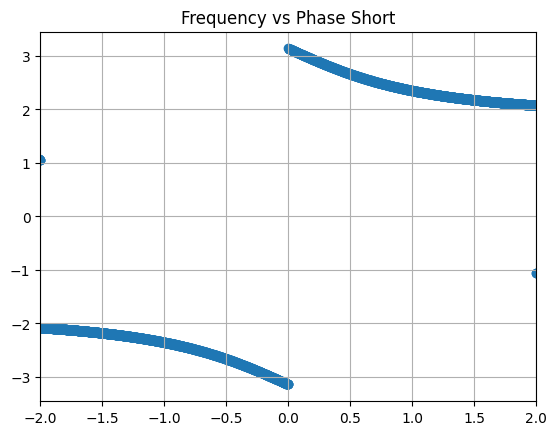

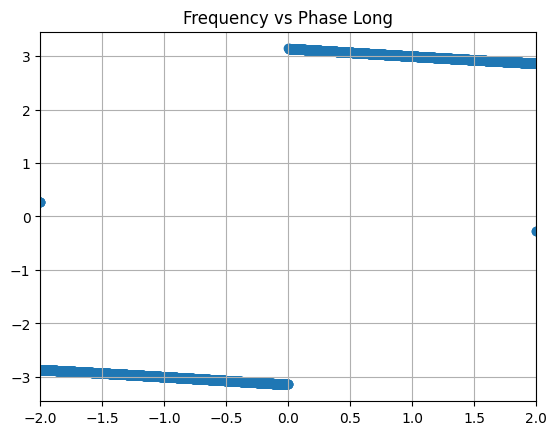

In [4]:
times = np.linspace(0,2*np.pi*100, 51200)

short = np.cos(4*np.pi*times)# + np.random.normal(512)/10
long = 0.5*np.cos(4*np.pi*times + (np.pi/4))# + np.random.normal(512)/10

sine_freqs = fftfreq(len(times), 2*np.pi*100/len(times))

plt.plot(times, short)
plt.title("Time vs Voltage Short")
plt.show()
plt.plot(times, long)
plt.title("Time vs Voltage Long")
plt.show()

sin_ft_short = fft(short)
sin_ft_long = fft(long)

sin_ft_short_mag = np.abs(sin_ft_short)
sin_ft_long_mag = np.abs(sin_ft_long)
sin_ft_short_phase = np.angle(sin_ft_short)
sin_ft_long_phase = np.angle(sin_ft_long)


plt.scatter(sine_freqs, sin_ft_short_mag)
plt.xlim(0,2.5)
plt.title("Frequency vs Magnitude SHort")
plt.show()
plt.scatter(sine_freqs, sin_ft_long_mag)
plt.xlim(0,2.5)
plt.title("Frequency vs Magnitude Long")
plt.show()

plt.scatter(sine_freqs, sin_ft_short_phase)
plt.xlim(-2,2)
plt.title("Frequency vs Phase Short")
plt.grid()
plt.show()
plt.scatter(sine_freqs, sin_ft_long_phase)
plt.xlim(-2,2)
plt.title("Frequency vs Phase Long")
plt.grid()
plt.show()


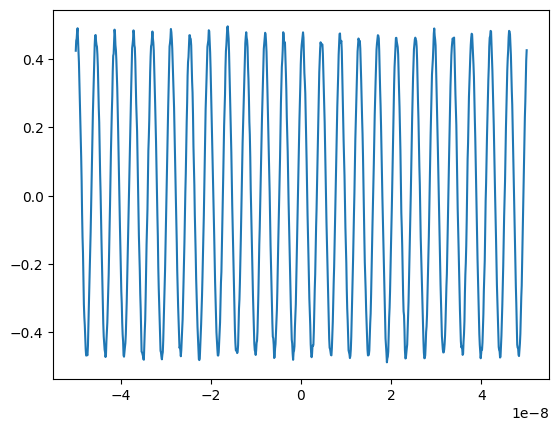

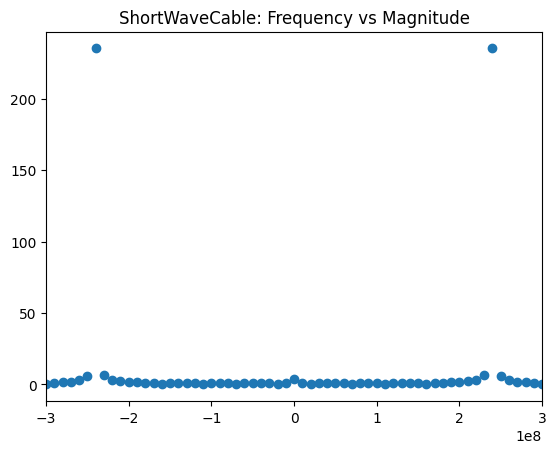

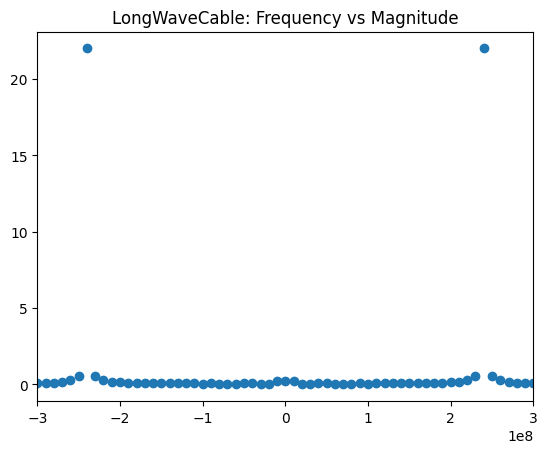

(1001, 2) (1001, 2)


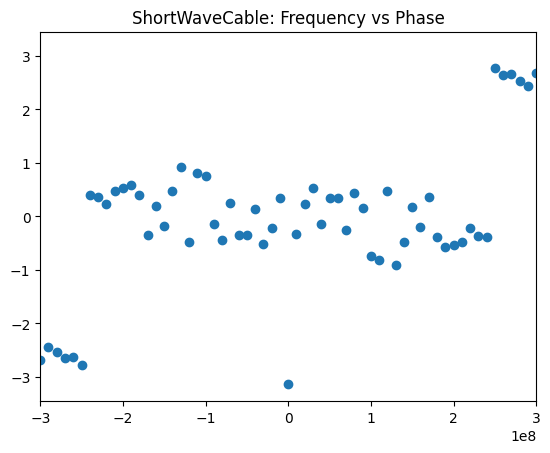

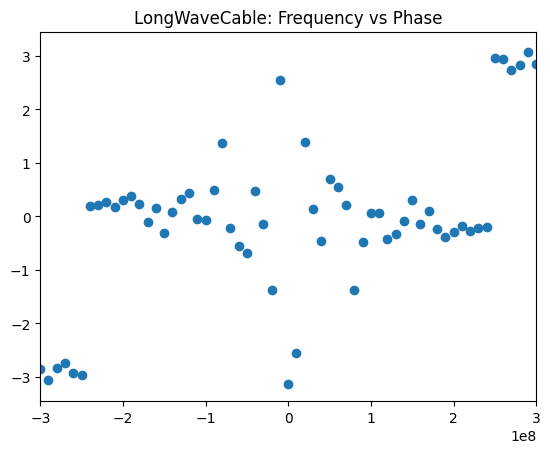

In [64]:
Short_cable_data = np.array(pd.read_csv('SineWave_ShortCable_240MHz_1Vpp.csv'))
Long_cable_data = np.array(pd.read_csv('SineWave_LongCable_240MHz_1Vpp.csv'))

times_isEqual = Short_cable_data[:,0]
num_samples = np.shape(Short_cable_data)[0]
time_span = Short_cable_data[-1,0] - Short_cable_data[0,0]
time_int = time_span / num_samples

plt.plot(times_isEqual, Short_cable_data[:,1])
plt.show()

same_freq = fftfreq(num_samples, time_int)

voltage_short = Short_cable_data[:,1]
voltage_long = Long_cable_data[:,1]

ft_short = fft(voltage_short)
ft_long = fft(voltage_long)

magnitude_short = np.abs(ft_short)
magnitude_long = np.abs(ft_long)
phase_short = np.angle(ft_short)
phase_long = np.angle(ft_long) 

plt.scatter(same_freq, magnitude_short)
plt.title('ShortWaveCable: Frequency vs Magnitude')
plt.xlim(-3e8,3e8)
plt.show()
plt.scatter(same_freq, magnitude_long)
plt.title('LongWaveCable: Frequency vs Magnitude')
plt.xlim(-3e8,3e8)
plt.show()





print(Short_cable_data.shape, Long_cable_data.shape)


plt.scatter(same_freq, phase_short)
plt.title('ShortWaveCable: Frequency vs Phase')
plt.xlim(-3e8,3e8)
plt.show()
plt.scatter(same_freq, phase_long)
plt.title('LongWaveCable: Frequency vs Phase')
plt.xlim(-3e8,3e8)
plt.show()
















240000000.0
0.09359979843989708
0.18966843276134532


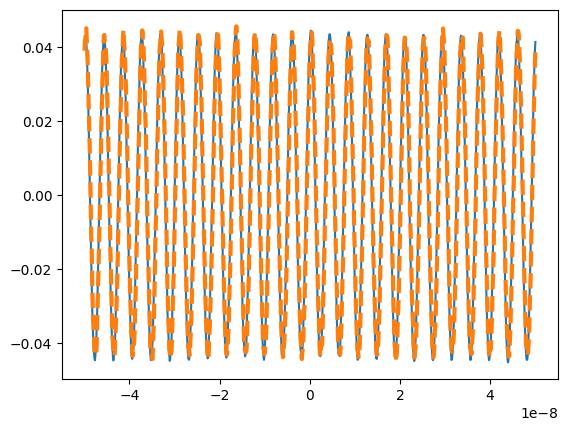

In [66]:
maxindex = np.argmax(magnitude_short)
print(same_freq[maxindex])
attenuation = magnitude_long[maxindex] / magnitude_short[maxindex]
print(attenuation)
phase_shift = phase_long[maxindex] - phase_short[maxindex]
print(phase_shift)


magnitude_both_simulated = attenuation * magnitude_short
phase_both_simulated = phase_shift + phase_short


voltage_both_simulated = ifft(magnitude_both_simulated * np.exp(1j * phase_both_simulated))

plt.plot(times_isEqual, voltage_long, label='Simulated')
plt.plot(times_isEqual, voltage_both_simulated, label='Actual', linestyle='dashed', linewidth=3)






